In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df=pd.read_csv('bank.csv',encoding='unicode_escape')

In [3]:
df.shape

(11162, 17)

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [6]:
df.dtypes.value_counts()

object    10
int64      7
Name: count, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [8]:
pd.isnull(df).sum()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [9]:
cat_cols=df.select_dtypes(include='object').columns
print(cat_cols)

num_cols=df.select_dtypes(exclude='object').columns
print(num_cols)


Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'poutcome', 'deposit'],
      dtype='object')
Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous'], dtype='object')


In [10]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [11]:
df.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,5881,9702,8042,2824,8326,5873


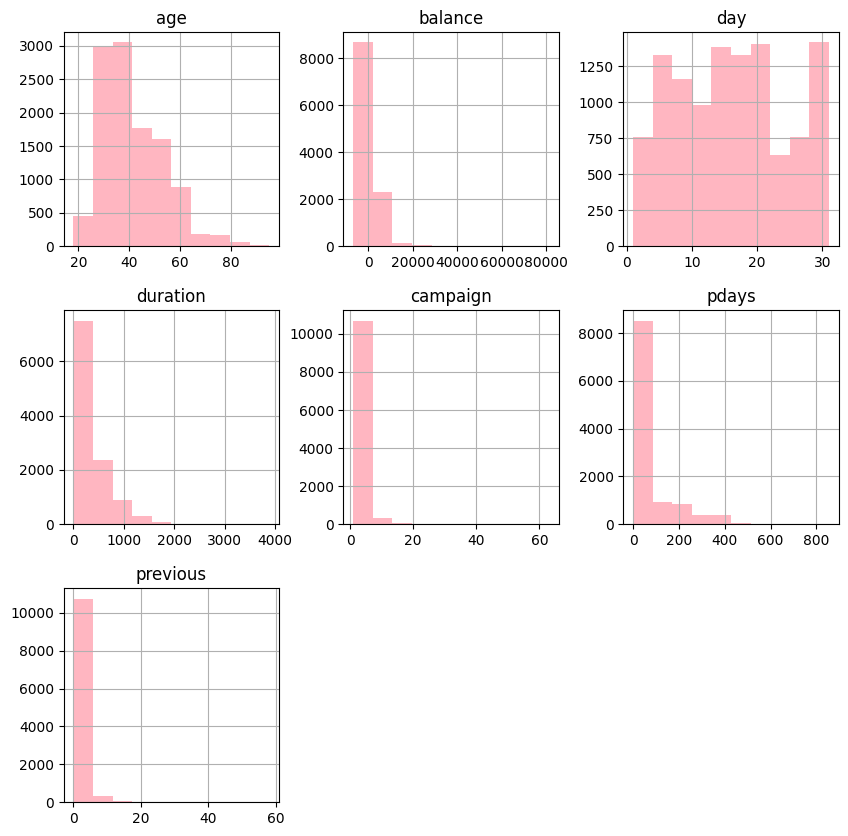

In [12]:
df.hist(figsize=(10,10),color='lightpink')
plt.show()

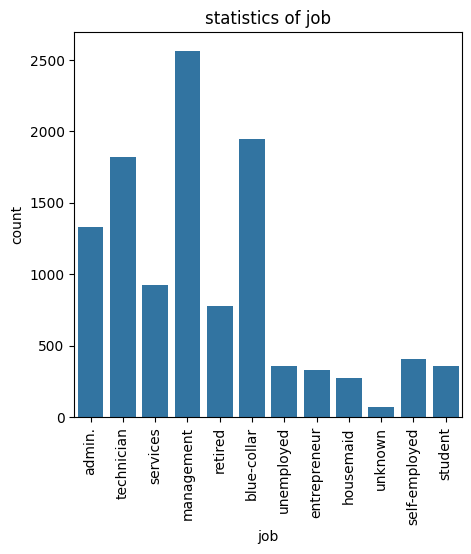

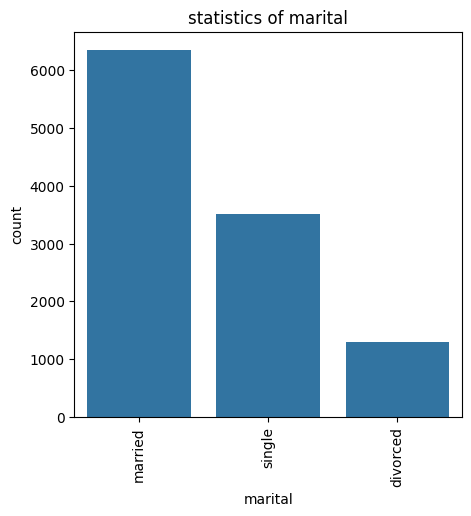

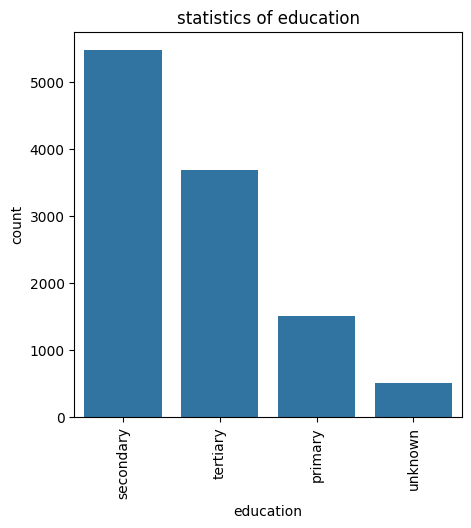

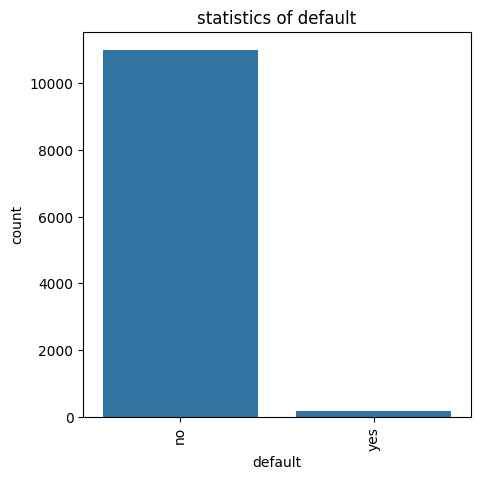

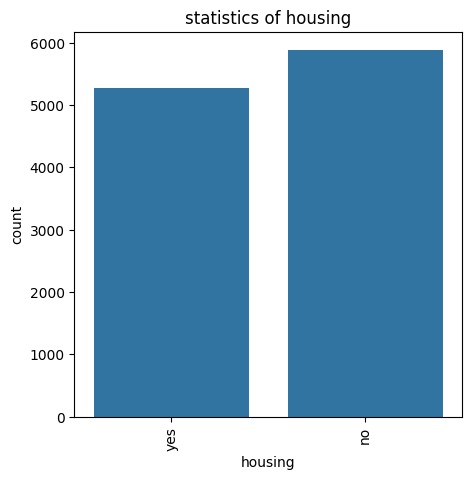

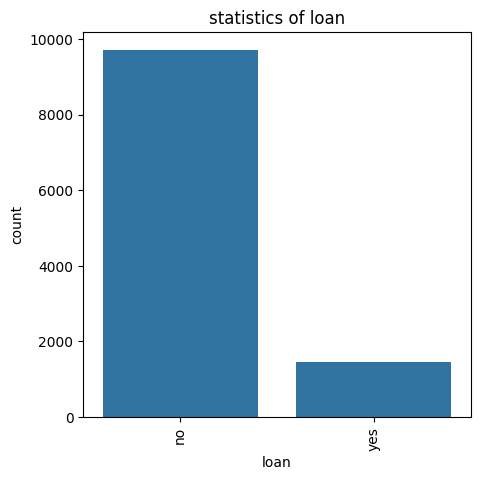

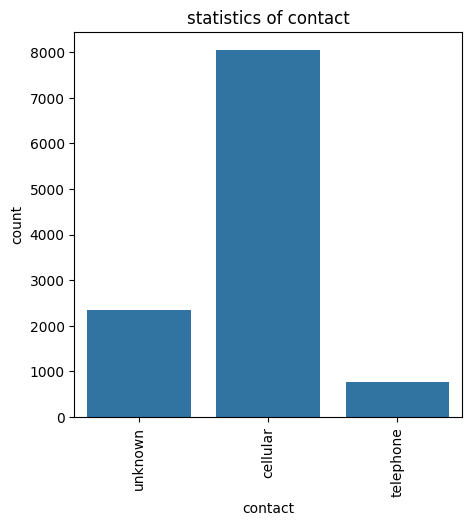

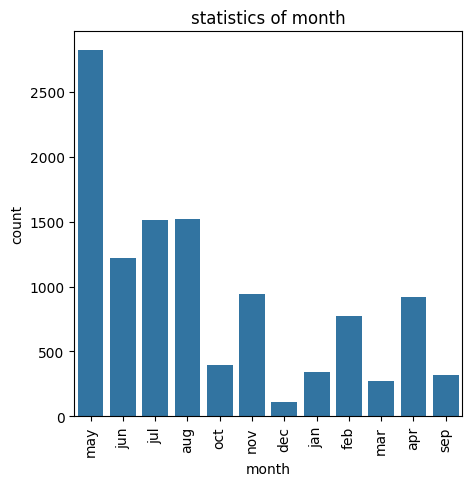

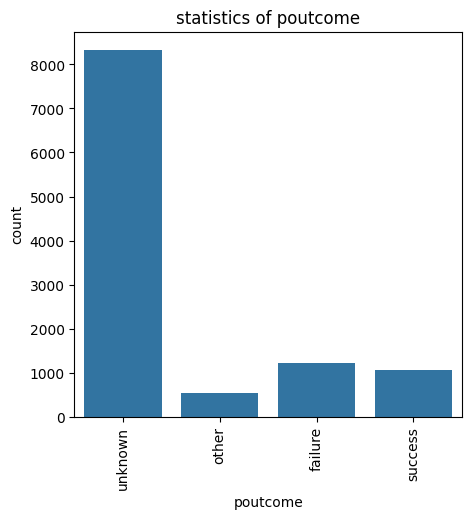

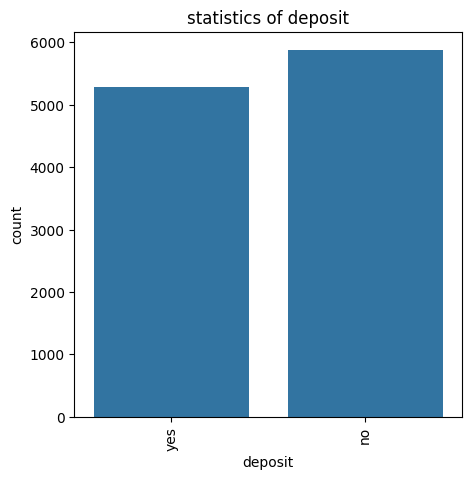

In [13]:
for feature in cat_cols:
    plt.figure(figsize=(5,5))
    sns.countplot(x=feature,data=df)
    plt.title(f'statistics of {feature}')
    plt.xlabel(feature)
    plt.ylabel('count')
    plt.xticks(rotation=90)

age            Axes(0.125,0.53;0.133621x0.35)
balance     Axes(0.285345,0.53;0.133621x0.35)
day          Axes(0.44569,0.53;0.133621x0.35)
duration    Axes(0.606034,0.53;0.133621x0.35)
campaign    Axes(0.766379,0.53;0.133621x0.35)
pdays          Axes(0.125,0.11;0.133621x0.35)
previous    Axes(0.285345,0.11;0.133621x0.35)
dtype: object

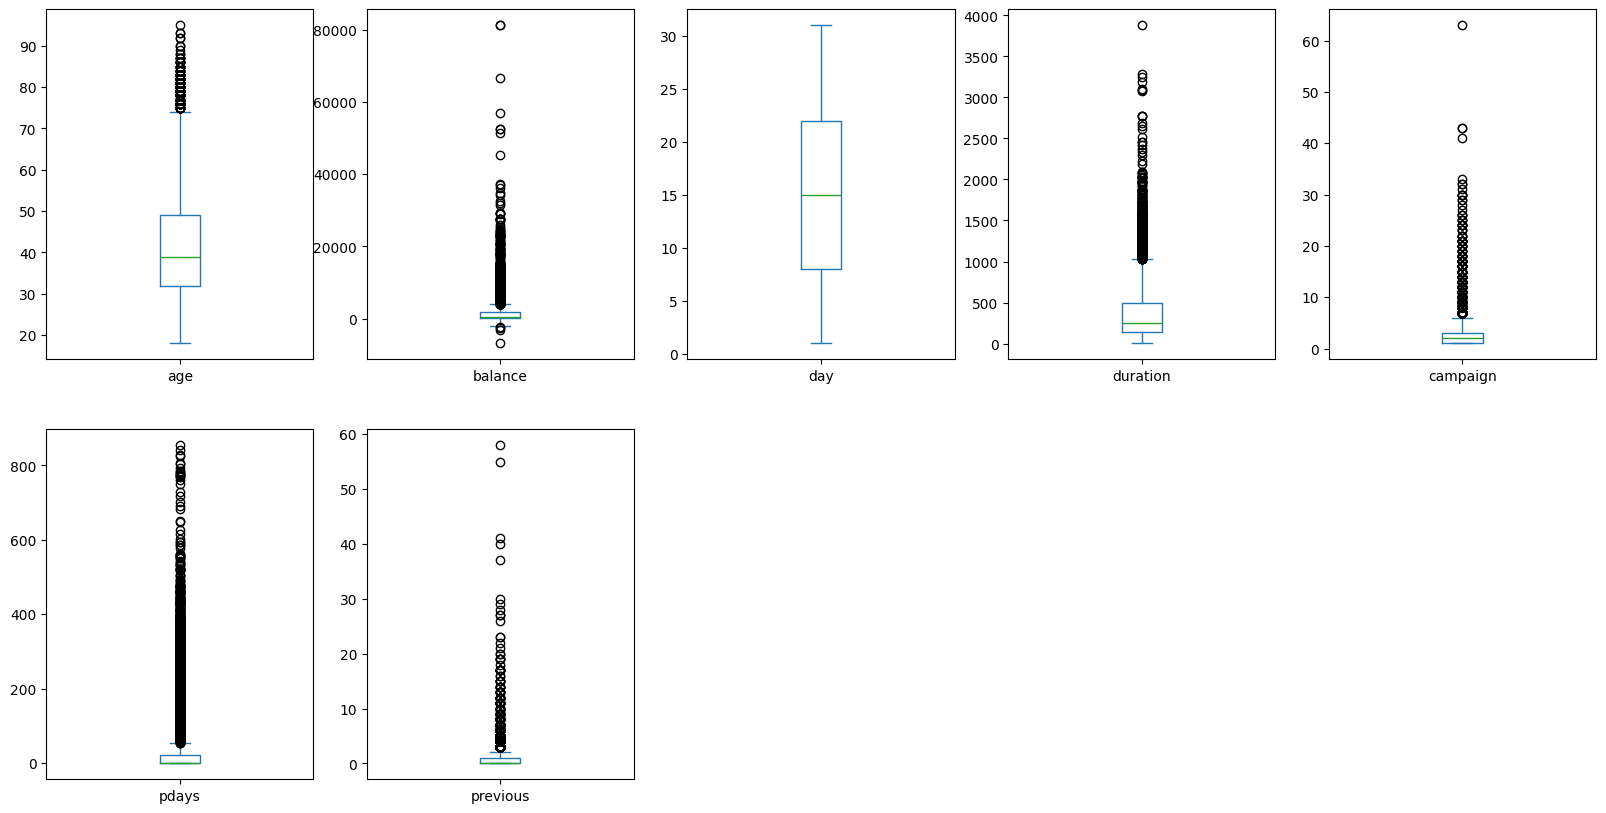

In [14]:
df.plot(kind='box',subplots=True ,layout=(2,5),figsize=(20,10))

In [15]:
column=df[['age','campaign','duration']]
q1=np.percentile(column,25)
q3=np.percentile(column,75)
iqr=q3-q1
lb=q1-1.5*iqr
up=q3+1.5*iqr
column=df[['age','campaign','duration']]=column[(column>lb)&(column<up)]

age            Axes(0.125,0.53;0.133621x0.35)
balance     Axes(0.285345,0.53;0.133621x0.35)
day          Axes(0.44569,0.53;0.133621x0.35)
duration    Axes(0.606034,0.53;0.133621x0.35)
campaign    Axes(0.766379,0.53;0.133621x0.35)
pdays          Axes(0.125,0.11;0.133621x0.35)
previous    Axes(0.285345,0.11;0.133621x0.35)
dtype: object

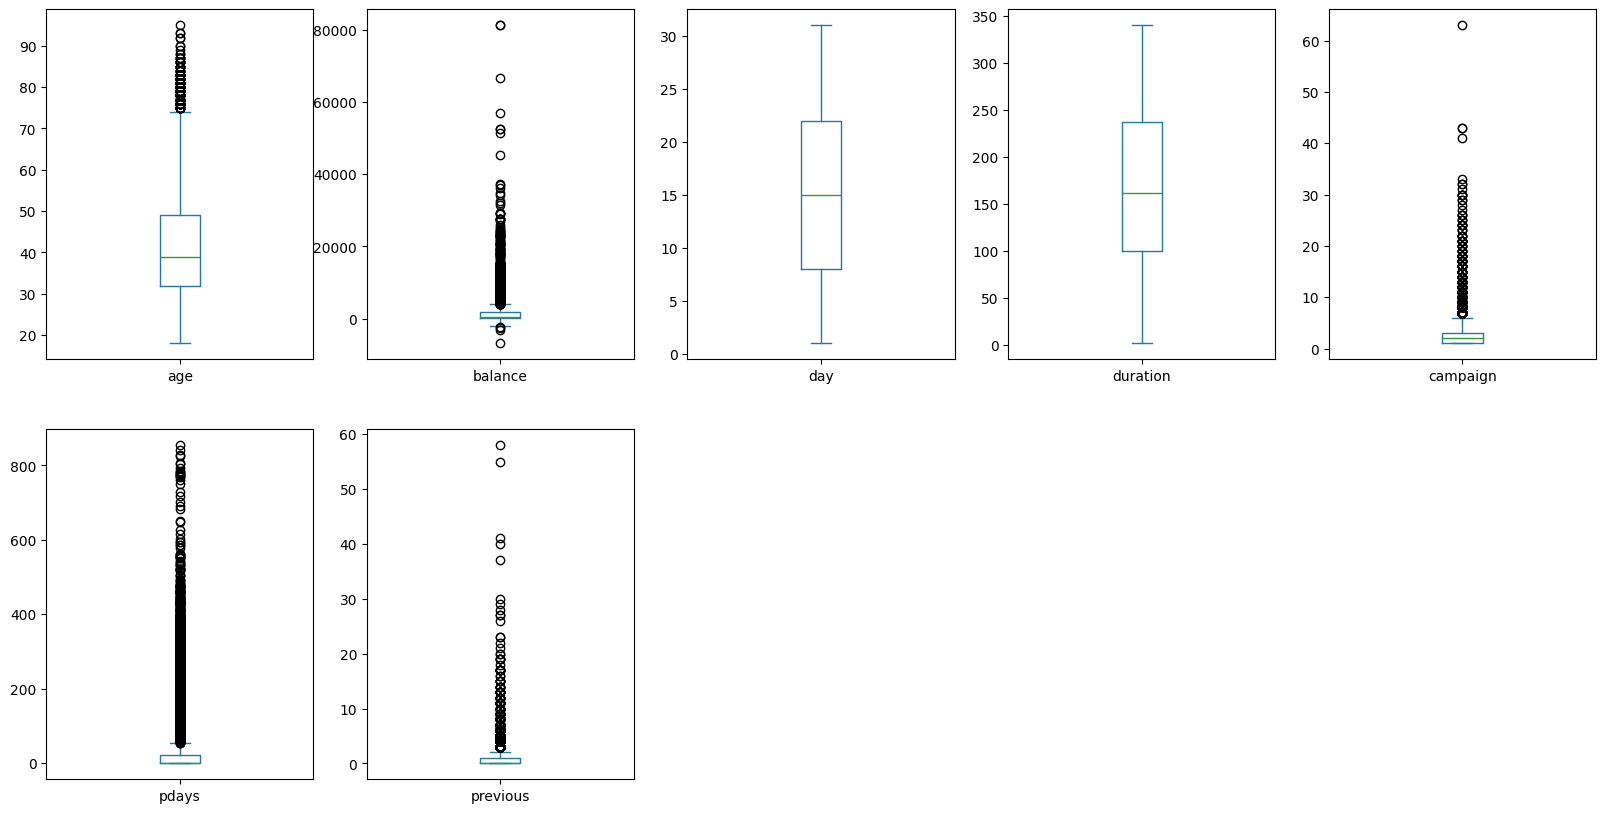

In [16]:
df.plot(kind='box',subplots=True,layout=(2,5),figsize=(20,10))

In [17]:
df1=df.copy()
df1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

In [20]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
df_ed=df1.apply(lb.fit_transform)
df_ed

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,41,0,1,1,0,2288,1,0,2,4,8,339,0,0,0,3,1
1,38,0,1,1,0,469,0,0,2,4,8,339,0,0,0,3,1
2,23,9,1,1,0,1618,1,0,2,4,8,339,0,0,0,3,1
3,37,7,1,1,0,2356,1,0,2,4,8,339,0,0,0,3,1
4,36,0,1,2,0,608,0,0,2,4,8,339,1,0,0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,15,1,2,0,0,425,1,0,0,19,0,255,0,0,0,3,0
11158,21,7,1,1,0,1149,0,0,2,15,6,81,3,0,0,3,0
11159,14,9,2,1,0,453,0,0,0,18,1,154,1,0,0,3,0
11160,25,9,1,1,0,424,0,1,0,7,8,7,1,155,5,0,0


In [21]:
df_ed['deposit'].value_counts()

deposit
0    5873
1    5289
Name: count, dtype: int64

In [23]:
x=df_ed.drop('deposit',axis=1)
y=df_ed['deposit']
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(11162, 16)
(11162,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [24]:
from sklearn.model_selection import train_test_split
print(11162*0.25)


2790.5


In [28]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)



(8371, 16)
(2791, 16)
(8371,)
(2791,)


In [38]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

def eval_model(y_test,y_pred):
    acc= accuracy_score(y_test,y_pred)
    print('accuracy_score',acc)
    cm=confusion_matrix(y_test,y_pred)
    print('confusion matrix\n',cm)
    print('classification report\n',classification_report(y_test,y_pred))

def mscore(model):
    train_score=model.score(x_train,y_train)
    test_score=model.score(x_test,y_test)
    print('training score:',train_score)
    print('testing score:',test_score)

In [34]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini',max_depth=5,min_samples_split=10)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10)

In [39]:
mscore(dt)

training score: 0.8058774339983276
testing score: 0.7832318165532067


In [40]:
ypred_dt=dt.predict(x_test)
print(ypred_dt)

[0 0 1 ... 0 1 0]


In [41]:
eval_model(y_test,ypred_dt)

accuracy_score 0.7832318165532067
confusion matrix
 [[1047  410]
 [ 195 1139]]
classification report
               precision    recall  f1-score   support

           0       0.84      0.72      0.78      1457
           1       0.74      0.85      0.79      1334

    accuracy                           0.78      2791
   macro avg       0.79      0.79      0.78      2791
weighted avg       0.79      0.78      0.78      2791



In [42]:
from sklearn.tree import plot_tree

In [43]:
cn=['no','yes']
fn=x_train.columns
print(fn)
print(cn)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome'],
      dtype='object')
['no', 'yes']


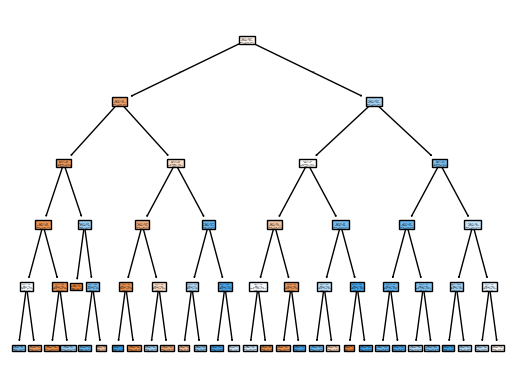

In [45]:
plot_tree(dt,class_names=cn,filled=True)
plt.show()

In [46]:
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=4,min_samples_split=15)
dt1.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=15)

In [48]:
mscore(dt1)

training score: 0.7675307609604587
testing score: 0.7642422070942314


In [50]:
ypred_dt=dt.predict(x_test)
eval_model(y_test,ypred_dt)

accuracy_score 0.7832318165532067
confusion matrix
 [[1047  410]
 [ 195 1139]]
classification report
               precision    recall  f1-score   support

           0       0.84      0.72      0.78      1457
           1       0.74      0.85      0.79      1334

    accuracy                           0.78      2791
   macro avg       0.79      0.79      0.78      2791
weighted avg       0.79      0.78      0.78      2791



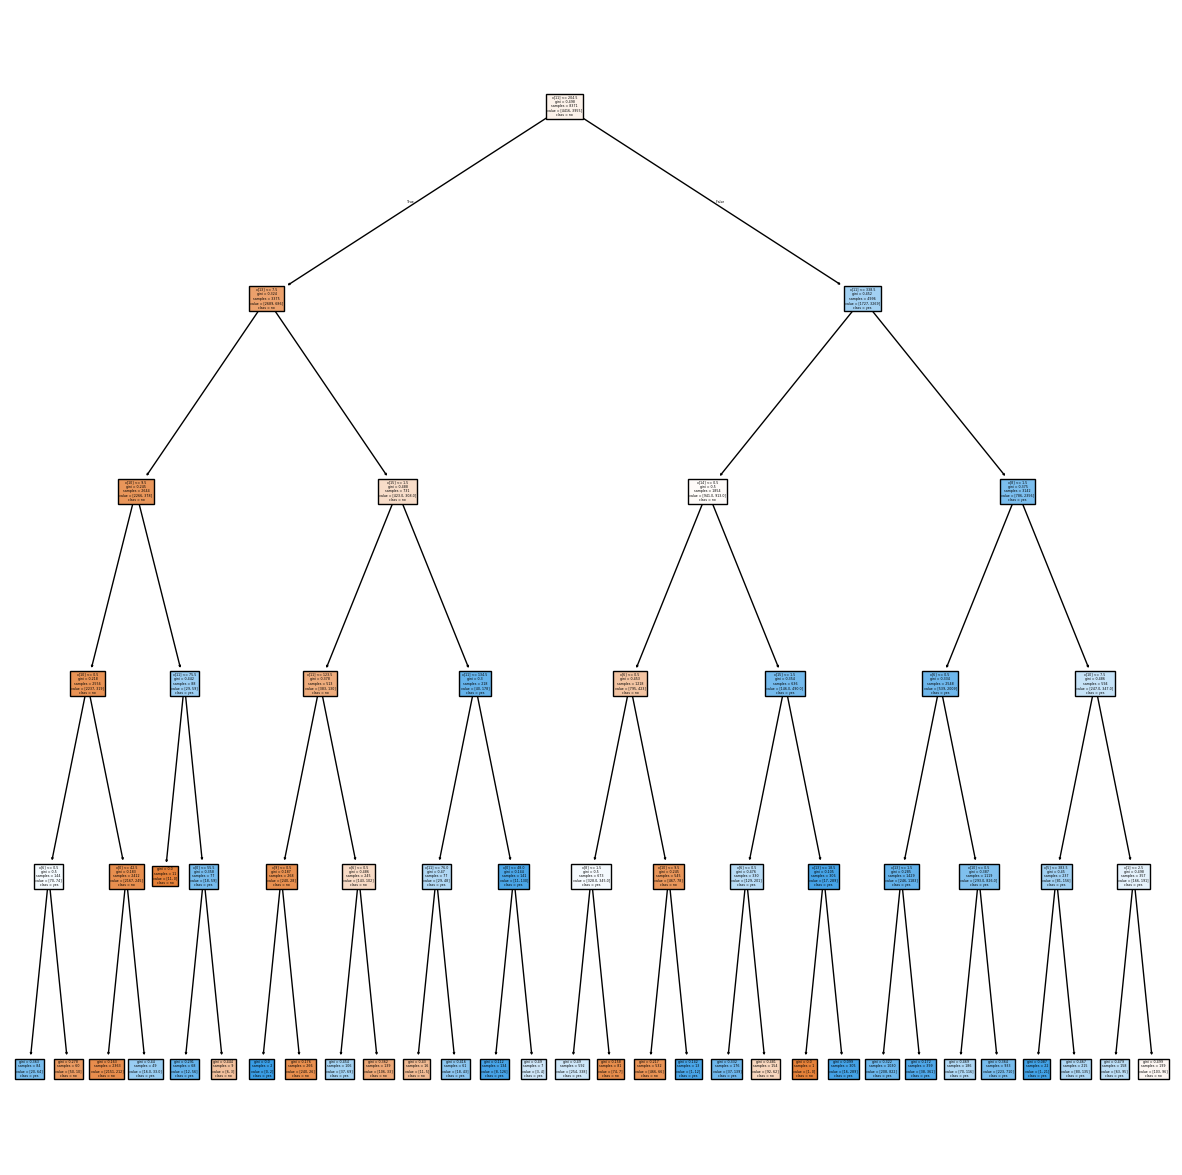

In [53]:
plt.figure(figsize=(15,15))
plot_tree(dt,class_names=cn,filled=True)
plt.show()